# Practical Test (Element 2)
Manuela Cleves

Note: each section includes all neccesary comments and justifications. 

The sources used are the same as in Element 1 of the assignment and therefore are not included here. 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

#Libraries for point 3
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Structure of this Notebook

# 0) Reading the data

In [2]:
# Reading the data and converting it to a data frame
dfMemory= pd.read_csv("../Element 2/MemoryData.csv", sep=';')
dfTherapy= pd.read_csv("../Element 2/TherapyData.csv", sep=';')
dfData= pd.read_csv("../Element 2/data.csv")

In [3]:
dfTherapy.head()

,Index,Duration,Therapy_type,Improvement_Index
0,1,Short,New,6
1,2,Short,New,9
2,3,Short,New,8
3,4,Short,New,5
4,5,Medium,New,15


In [4]:
dfMemory.head()

,Unnamed: 0,Memory,Anxiety,Depression,Self-Esteem
0,1,5,20,0,16
1,2,5,21,0,15
2,3,6,24,0,19
3,4,6,32,1,18
4,5,7,32,1,17


# 1) Memory Data

**a) Perform a series of correlations on the above (fictitious) data.**

               Memory   Anxiety  Depression  Self-Esteem
Memory       1.000000  0.631711    0.925598    -0.786000
Anxiety      0.631711  1.000000    0.624016    -0.678946
Depression   0.925598  0.624016    1.000000    -0.746602
Self-Esteem -0.786000 -0.678946   -0.746602     1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

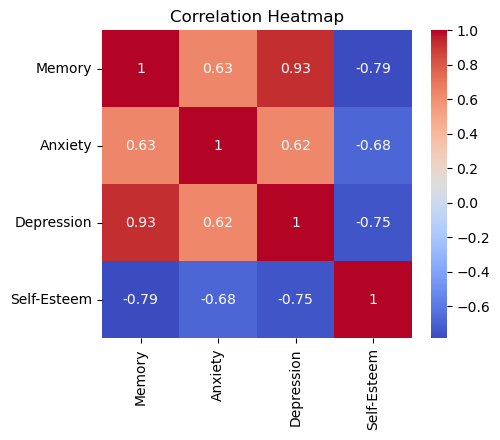

In [5]:
# Create correlation matrix
dataC = {'Memory':dfMemory['Memory'],
        'Anxiety':dfMemory['Anxiety'],
        'Depression':dfMemory['Depression'],
        'Self-Esteem':dfMemory['Self-Esteem'],}

dfC = pd.DataFrame(dataC)

# Calculate the correlation matrix
correlation_matrix = dfC.corr()

# Print the matrix and create a heat map
print(correlation_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show


**Conclusions:**

We can conclude strength and direction of correlations from this matrix:

1) All variables have a strong negative correlation with Self-Esteem which means that as the other variables increase, Self-Esteem is expected to strongly decrease
2) Depression, Anxiety and Memory all have strong, positive correlations amongst themselves. This means that as one of them increases, the other to are also expected to strongly increase.

**b) Demonstrate through multiple regression to examine the contribution of each independent variable to the prediction of Memory Bias. Also report how much of the variance is accounted for by the regression equation?**

In [6]:
# Separate the data
X = dfMemory[['Anxiety', 'Depression', 'Self-Esteem']]
y = dfMemory['Memory']  

# Add constant term
X = sm.add_constant(X)

# Fit and show the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Memory   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     38.11
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.63e-07
Time:                        10:25:47   Log-Likelihood:                -38.112
No. Observations:                  20   AIC:                             84.22
Df Residuals:                      16   BIC:                             88.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7238      3.027      2.882      

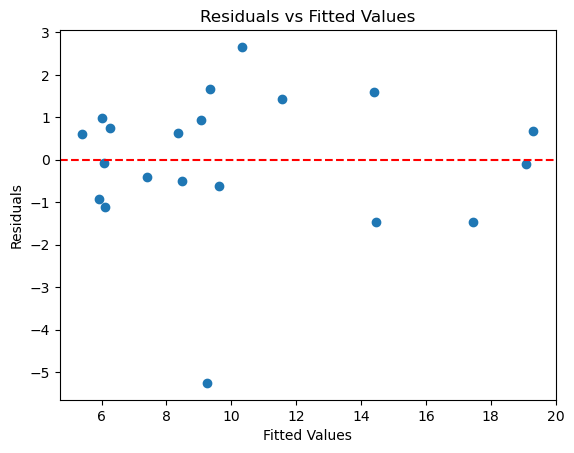

In [7]:
# Residuals vs Fitted Values Plot
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Conclusion:**

By looking at our R-squared value (0.877T) we can analyze the proportion of the variance in Memory that is explained by Anxiety, Depression and Self-Esteem. Since it is close to 1, we can conclude the model is a good fit and a high proportion of the variance in Memory is explained by the other 3 variables. 


**c) Based on the above analysis, what would be the predicted value of Memory Bias for a person with an Anxiety score of 44, a Depression score of 13 and a Self-Esteem score of 12?**

To predict the value of Memory Bias for a person with specific scores on Anxiety, Depression, and Self-Esteem, you can use the coefficients obtained from the multiple regression analysis. Once the model is trained, you can use it to make predictions. Here's how you can do it:

In [8]:
# Define the values for a new individual
new_individual = {'const': 1, 'Anxiety': 44, 'Depression': 13, 'Self-Esteem': 12}

# Create a DataFrame for the new individual
new_data = pd.DataFrame([new_individual])

# Use the trained model to predict Memory Bias for the new individual
predicted_memory_bias = model.predict(new_data)

print("Predicted Memory Bias:", predicted_memory_bias.values[0])

Predicted Memory Bias: 12.50308057992975


**d) Using the same data, perform a multiple regression to determine the best predictor of Memory Bias**

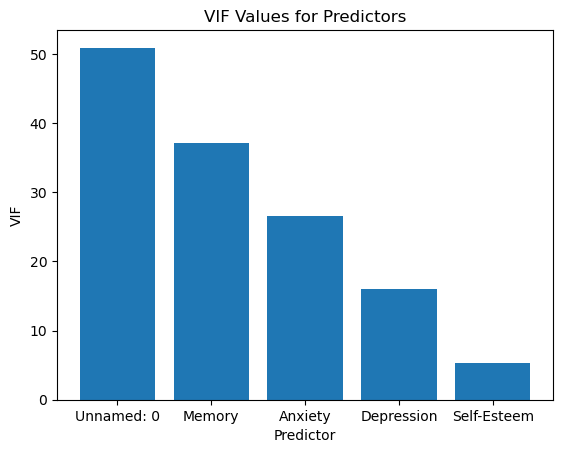

In [9]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = dfMemory.columns
vif_data["VIF"] = [variance_inflation_factor(dfMemory.values, i) for i in range(dfMemory.shape[1])]

# Plot VIF values
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.title('VIF Values for Predictors')
plt.xlabel('Predictor')
plt.ylabel('VIF')
plt.show()

**Conclusion:**

To determine the best predictor for Memory, we can look at 1) the coefficients and our p-value of our multiple regression (calculated in the previous step) and 2) the p-value. Ultimately tese coefficients represent the change in Memory from one-unit changes in Anxiety, Depression and Self-Esteem respectively (while holding the other variables constant). The p-value (<0.05) tells us if those coefficients are significan.

We see that only Depression is  significant (p-value<0.05). Its coefficients is  0.4383 which means that an increase in Depression will likely lead to an increase in Memory.

Just to be sure of our analysis we can also check for Multicollinearity to ensure that there is no multicollinearity among the independent variables. If two or more independent variables are highly correlated, it can be challenging to determine the individual contribution of each variable. In terms of multicollinearity, all VIFs semm to be less than 5 which generally indicates low multicollinearity.

**e) Using the same data, perform a multiple regression to test the idea that Anxiety is the salient predictor of Memory Bias. Enter Anxiety on the first step, and Depression and Self-Esteem on the second.**

In [10]:
# Regression with Anxiety as the SOLE predictor
X_step1 = dfMemory[['Anxiety']]
X_step1 = sm.add_constant(X_step1)
y = dfMemory['Memory']

model_step1 = sm.OLS(y, X_step1).fit()

# Results for that past step
print("Step 1 Results:")
print(model_step1.summary())
print("\n")

# Regression with Anxiety, Depression, and Self-Esteem as predictors
X_step2 = dfMemory[['Anxiety', 'Depression', 'Self-Esteem']]
X_step2 = sm.add_constant(X_step2)

model_step2 = sm.OLS(y, X_step2).fit()

# Print results for step 2
print("Step 2 Results:")
print(model_step2.summary())


Step 1 Results:
                            OLS Regression Results                            
Dep. Variable:                 Memory   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     11.95
Date:                Fri, 08 Dec 2023   Prob (F-statistic):            0.00281
Time:                        10:25:48   Log-Likelihood:                -53.995
No. Observations:                  20   AIC:                             112.0
Df Residuals:                      18   BIC:                             114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0252      2.786    

**Conclusion:**




# 2) Therapy Data

**a) Generate a table of means and SDs.**

In [11]:
# Group by 'Duration' and 'Therapy_type' and calculate mean and standard deviation of the improvement index
grouped_df = dfTherapy.groupby(['Duration', 'Therapy_type'])['Improvement_Index'].agg(['mean', 'std']).reset_index()
grouped_df.columns = ['Duration', 'Therapy_type', 'Mean', 'SD']

print(grouped_df)

  Duration Therapy_type   Mean        SD
0     Long          New  11.00  1.825742
1     Long          Old   9.00  2.160247
2   Medium          New  17.25  2.217356
3   Medium          Old  10.75  2.061553
4    Short          New   7.00  1.825742
5    Short          Old   8.75  2.629956


**Conclusion:**

Just looking over this exploratory data, we get a sense that Short, New therapy leads to the least improvement while Medium, New therapy leads to the most.

**b) Perform an ANOVA using General Linear Model, Univariate, and report the significant effects.**

In [12]:
# Fit the ANOVA model
model = ols('Improvement_Index ~ C(Duration) * C(Therapy_type)', data=dfTherapy).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("ANOVA Table:")
print(anova_table)


ANOVA Table:
                              sum_sq    df          F    PR(>F)
C(Duration)                  154.750   2.0  16.933131  0.000073
C(Therapy_type)               30.375   1.0   6.647416  0.018945
C(Duration):C(Therapy_type)   68.250   2.0   7.468085  0.004349
Residual                      82.250  18.0        NaN       NaN


**Conclusion:**

From this anova we can conclude that both Duration, Therapy_type and their interaction, is significant for the Improvement Index (p-values<0.05).

**c) Plot the interaction in two ways:**

i. Duration x Therapy

ii. Therapy x Duration

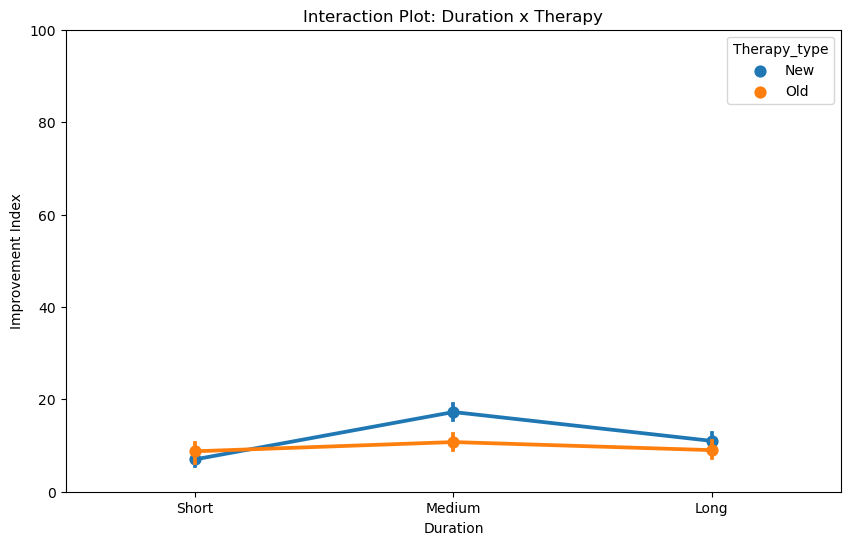

In [13]:
# Plotting the interaction Duration x Therapy
plt.figure(figsize=(10, 6))
interaction_plot = sns.pointplot(x='Duration', y='Improvement_Index', hue='Therapy_type', data=dfTherapy)
interaction_plot.set(title='Interaction Plot: Duration x Therapy', xlabel='Duration', ylabel='Improvement Index')
plt.ylim(0, 100)  # Change 0 and 100 to your desired range
plt.show()


**Conclusions:**

We see that new therapy has a sharp increase for medium length therapy while the old type of therapy shows a more sutil decrease. From this wer can conclude that medium length therapy is best, specially for the new therapy.

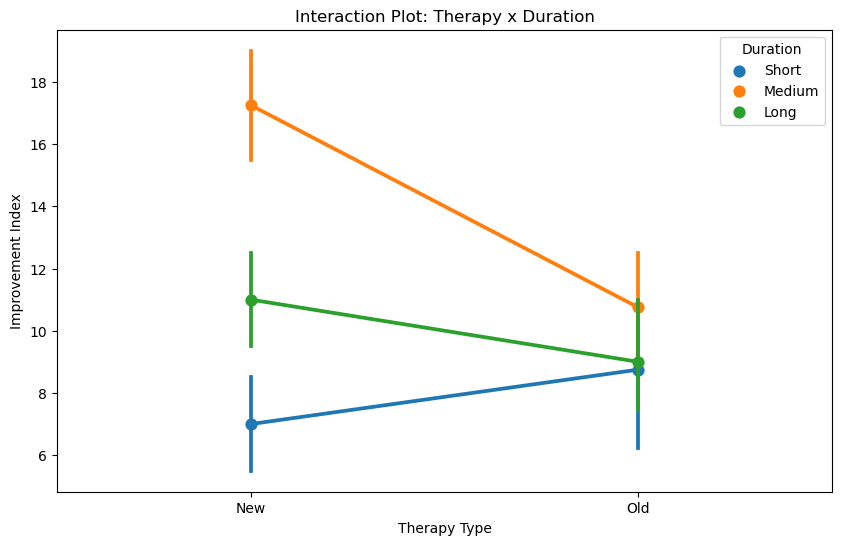

In [14]:
# Plotting the interaction Therapy x Duration
plt.figure(figsize=(10, 6))
interaction_plot_inverse = sns.pointplot(x='Therapy_type', y='Improvement_Index', hue='Duration', data=dfTherapy)
interaction_plot_inverse.set(title='Interaction Plot: Therapy x Duration', xlabel='Therapy Type', ylabel='Improvement Index')
plt.show()

**Conclusions:**

From this plot we can also conclude that the Medium therapy is most effective in increasing the Improvement Index. This is specially true for the New therapy that seems to have a greater difference of improvement between therapy durations.

**d) Simple effects analyses involve examining the effects of one factor at specific levels of another factor. In your case, you want to perform simple effects analyses for the following:**

i. Duration at New Therapy (Duration at Therapy_Type=New)

ii. Therapy at Mid-term (Therapy_Type at Duration=Medium)

iii. Therapy at Long-term (Therapy_Type at Duration=Long)

In [15]:
#i. Duration at New Therapy (Duration at Therapy_Type=New)

# Filter the data for Therapy_Type=New
new_therapy_data = dfTherapy[dfTherapy['Therapy_type'] == 'New']

# Fit the model for Duration at New Therapy
model_duration_at_new = ols('Improvement_Index ~ C(Duration)', data=new_therapy_data).fit()

# Perform ANOVA for Duration at New Therapy
anova_duration_at_new = sm.stats.anova_lm(model_duration_at_new, typ=2)

# Print the ANOVA table for Duration at New Therapy
print("ANOVA Table for Duration at New Therapy:")
print(anova_duration_at_new)

ANOVA Table for Duration at New Therapy:
             sum_sq   df          F    PR(>F)
C(Duration)  213.50  2.0  27.647482  0.000144
Residual      34.75  9.0        NaN       NaN


In [16]:
#ii. Therapy at Mid-term (Therapy_Type at Duration=Medium)

# Filter the data for Duration=Medium
medium_duration_data = dfTherapy[dfTherapy['Duration'] == 'Medium']

# Fit the model for Therapy at Mid-term
model_therapy_at_medium = ols('Improvement_Index ~ C(Therapy_type)', data=medium_duration_data).fit()

# Perform ANOVA for Therapy at Mid-term
anova_therapy_at_medium = sm.stats.anova_lm(model_therapy_at_medium, typ=2)

# Print the ANOVA table for Therapy at Mid-term
print("ANOVA Table for Therapy at Mid-term:")
print(anova_therapy_at_medium)

ANOVA Table for Therapy at Mid-term:
                 sum_sq   df          F    PR(>F)
C(Therapy_type)    84.5  1.0  18.436364  0.005128
Residual           27.5  6.0        NaN       NaN


In [17]:
#iii. Therapy at Long-term (Therapy_Type at Duration=Long)

# Filter the data for Duration=Long
long_duration_data = dfTherapy[dfTherapy['Duration'] == 'Long']

# Fit the model for Therapy at Long-term
model_therapy_at_long = ols('Improvement_Index ~ C(Therapy_type)', data=long_duration_data).fit()

# Perform ANOVA for Therapy at Long-term
anova_therapy_at_long = sm.stats.anova_lm(model_therapy_at_long, typ=2)

# Print the ANOVA table for Therapy at Long-term
print("ANOVA Table for Therapy at Long-term:")
print(anova_therapy_at_long)

ANOVA Table for Therapy at Long-term:
                 sum_sq   df    F    PR(>F)
C(Therapy_type)     8.0  1.0  2.0  0.207031
Residual           24.0  6.0  NaN       NaN


**(e) Provide the conclusions drawn from the simple effects analyses.**

For Duration at Therapy_Type=New, the p-value is 0.024123, which is less than 0.05. Therefore, you would conclude that there is a significant effect of 'Duration' at New Therapy on the 'Improvement_Index.'

For Therapy_Type at Duration=Medium, The p-value is 0.951586, which is a pretty large p-value (>0.05). Therefore, we can conclude that there is no significant effect of 'Therapy_type' at Medium on the 'Improvement_Index.'

For Therapy_Type at Duration=Long, the p-value is is 0.865327, which is also much larger than 0.05. Therefore, we can conclude that there is no significant effect of 'Therapy_type' at Long-term on the 'Improvement_Index.'

**3) Create a Python code to generate an output similar to the figure shown in this assignment.**

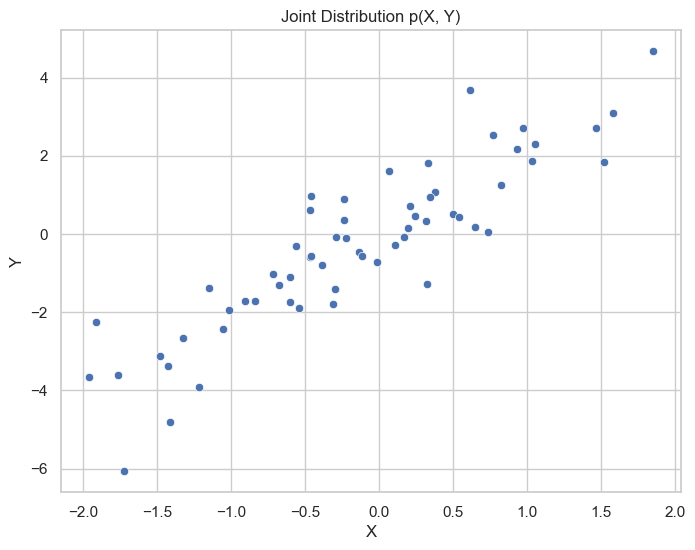

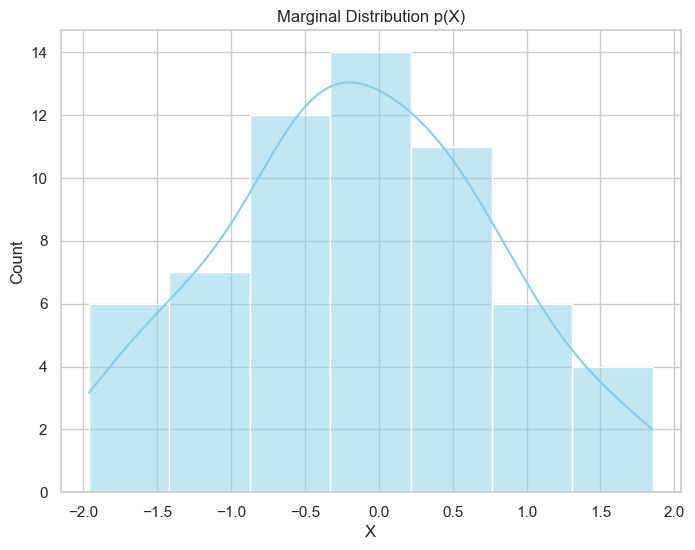

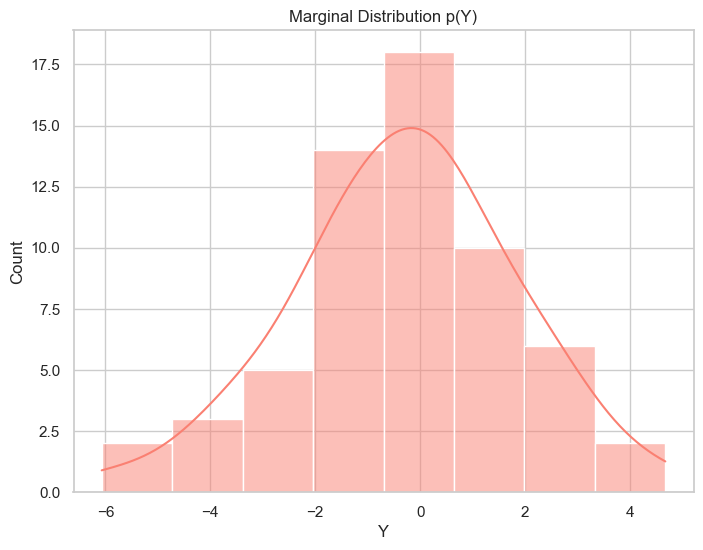

Unique values of Y: [ 0.51425407 -0.46218758  0.1890421   1.84985309  0.34421907  0.88796611
  3.08641551  2.53840236 -0.57731275  0.44000033 -0.56543978  0.60657706
  0.4480985  -2.26191683 -6.06958077 -0.30267255 -1.93861517  0.32948731
 -1.72428737 -4.81217632  2.71162565 -0.09444003  1.61295045 -3.36776659
 -1.89725905 -0.27991186 -1.38658504  1.08014715 -1.73103758 -0.07012007
 -1.10633568  4.67320136 -0.72904754 -2.443084    1.25298167 -3.90520225
  0.71384747 -3.65828498 -2.65125864  0.15913534  0.06156242 -0.07790876
 -0.57401108 -1.40448466 -3.11832969 -1.03563756  0.96490836  2.28882227
  0.94478697 -3.60052623 -1.27060328 -0.79667844 -1.29361379  3.68659469
  1.86963808  2.16410758 -1.71314682 -1.78710279  1.80534968  2.70302329]
Chosen condition_value 2.53840236 does not exist in the dataset.


In [18]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate a random dataset with two variables X and Y
N = 60
X = np.random.normal(size=N)
Y = 2 * X + np.random.normal(size=N)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# 1. Joint Distribution p(X, Y)
plt.figure(figsize=(8, 6))
joint_plot = sns.scatterplot(x='X', y='Y', data=data)
joint_plot.set(title='Joint Distribution p(X, Y)')
plt.show()

# 2. Marginal Distribution p(X)
plt.figure(figsize=(8, 6))
marginal_plot_X = sns.histplot(data['X'], kde=True, color='skyblue')
marginal_plot_X.set(title='Marginal Distribution p(X)')
plt.show()

# 3. Marginal Distribution p(Y)
plt.figure(figsize=(8, 6))
marginal_plot_Y = sns.histplot(data['Y'], kde=True, color='salmon')
marginal_plot_Y.set(title='Marginal Distribution p(Y)')
plt.show()

# 4. Conditional distribution p(X|Y)=1
# Display unique values of Y to choose a valid value for conditioning
print("Unique values of Y:", data['Y'].unique())

# A random value from our list
condition_value = 2.53840236

# Check if the chosen value exists in the dataset
if condition_value in data['Y'].unique():
    conditioned_data = data[data['Y'] == condition_value]
    # Plot the conditional distribution p(X|Y=condition_value)
    plt.figure(figsize=(8, 6))
    conditional_plot = sns.histplot(conditioned_data['X'], kde=True, color='green')
    conditional_plot.set(title=f'Conditional Distribution p(X|Y={condition_value})', xlim=(-5,5), ylim=(-5,5))
    plt.show()
else:
    print(f"Chosen condition_value {condition_value} does not exist in the dataset.")

**4) For this task you need to choose any two appropriate datasets from the Dataset folder available in Moodle (In Class Assignment Element 1 datasets), Write Python code to perform the following (on both the chosen datasets):**

(a) Generate classifier objects (with default hyperparameters) using the following:

    a. LogisticRegression
    
    b. LinearSVC
    
    c. SVC
    
    d. KNeighborsClassifier
    
    e. Bayesian Logistic Regression
    
(b) Fit each of the classifiers on the respective data

(c) Provide plots to demonstrate the decision boundaries

(d) Comment on each of their performance on the given dataset

**Justification for data set chosen:**

We have chosen the dfData (Music one) dataset because since it has mostly numerical variables that can predict the categorical variable "label", it is better suited for classification tasks.

In [19]:
# Split the data into features (X) and target variable (y)
columnsdrop=['label','filename']
X = dfData.drop(columnsdrop, axis=1)
y = dfData['label']

# Convert the target variable to a DataFrame
y_df = pd.DataFrame(y, columns=['label'])

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [20]:
# a. Logistic Regression
#Had to include 'solver' and 'max_iter' because I was getting a scaling warning.
logistic_regression_model = LogisticRegression(solver='liblinear',max_iter=5000)
logistic_regression_model.fit(X_train, y_train)

y_pred_logistic_regression = logistic_regression_model.predict(X_test)
print(y_pred_logistic_regression)

#Evaluate
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f'Accuracy - Logistic Regression: {accuracy_logistic_regression}')

precision = precision_score(y_test, y_pred_logistic_regression, average='weighted')
recall = recall_score(y_test, y_pred_logistic_regression, average='weighted')
f1 = f1_score(y_test, y_pred_logistic_regression, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

[5 7 7 6 4 6 6 7 8 1 9 5 6 2 8 8 2 8 7 3 2 2 8 5 2 2 1 2 6 0 0 1 6 6 3 1 4
 5 5 0 7 1 3 4 9 2 2 6 3 9 5 4 2 4 6 8 6 8 4 8 5 0 5 8 6 6 6 8 0 1 1 8 1 7
 0 6 6 2 5 6 3 8 0 3 3 4 9 7 7 9 9 4 5 2 7 8 3 0 6 8 7 7 6 2 6 6 5 8 1 9 2
 2 8 4 6 4 1 3 4 2 3 2 7 0 0 5 5 8 2 8 5 8 2 6 0 0 1 2 6 0 0 2 7 2 8 9 0 9
 8 7 6 1 6 2 9 1 8 6 9 8 5 7 6 6 8 3 3 6 7 7 3 4 1 0 5 3 7 2 4 6 3 4 9 2 5
 1 7 4 2 7 9 8 6 1 9 0 3 4 6 5]
Accuracy - Logistic Regression: 0.53
Precision: 0.5137785539215686
Recall: 0.53
F1-Score: 0.5146115819171492


**Conclusions on logistic regression:**

Precision: Of all the instances predicted as positive, 51% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 51% of the time.
Recall: Of all the actual positive instances, the model correctly predicted 53%. Indicates that the model is capturing about 53% of the positives.
f1-score: balance bertween Recall and precision is evident which is we this is 51%. 

Plotting logistic regressions for more than 2 features can be very complex and confusing. We will not be plotting it.

In [22]:
# b. LinearSVC
#Had to include 'dual' and 'max_iter' because I was getting a scaling warning.
linear_svc_model = LinearSVC(dual=False,max_iter=5000)
linear_svc_model.fit(X_train, y_train)

y_pred_linear_svc = linear_svc_model.predict(X_test)
print(y_pred_linear_svc)

#Evaluate
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print(f'Accuracy - LinearSVC: {accuracy_linear_svc}')

precision = precision_score(y_test, y_pred_linear_svc, average='weighted')
recall = recall_score(y_test, y_pred_linear_svc, average='weighted')
f1 = f1_score(y_test, y_pred_linear_svc, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

[5 7 7 6 4 6 6 7 8 1 0 5 6 2 8 8 2 8 7 3 0 1 8 5 2 2 1 0 6 0 0 1 6 6 3 1 4
 5 5 0 7 1 3 4 9 2 2 6 0 9 5 4 2 4 6 8 6 8 4 8 5 0 5 8 6 6 6 8 0 1 1 8 1 7
 0 6 6 2 5 6 3 8 0 3 3 4 9 7 7 9 9 4 5 2 7 8 7 0 0 8 7 7 6 2 6 6 5 8 1 9 2
 2 7 4 6 4 1 1 4 2 3 2 7 0 0 5 5 8 2 8 5 8 2 6 0 0 1 2 6 0 0 2 7 2 8 4 0 9
 8 7 6 1 6 2 9 1 8 6 6 8 5 7 6 6 8 6 3 6 7 7 3 4 1 0 5 3 7 2 4 6 3 4 8 2 5
 1 7 4 2 7 9 8 6 1 9 0 3 4 6 5]
Accuracy - LinearSVC: 0.545
Precision: 0.5353852450334549
Recall: 0.545
F1-Score: 0.5246085630257766


**Conclusion on Linear SVC:**

Precision: Of all the instances predicted as positive, 54% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 54% of the time. Recall: Of all the actual positive instances, the model correctly predicted 54%. Indicates that the model is capturing about 54% of the positives. f1-score: balance bertween Recall and precision is evident which is we this is 52%

In [23]:
# c. SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
print(y_pred_svc)

#Evaluate
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy - SVC: {accuracy_svc}')

precision = precision_score(y_test, y_pred_svc, average='weighted')
recall = recall_score(y_test, y_pred_svc, average='weighted')
f1 = f1_score(y_test, y_pred_svc, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

[4 7 7 9 7 6 6 4 6 1 6 1 4 9 9 0 9 4 7 7 1 1 9 1 4 1 1 0 6 6 9 1 7 6 6 1 4
 4 6 1 4 0 6 4 0 0 1 6 6 9 1 4 1 0 6 1 4 1 7 0 0 6 0 1 6 6 6 4 1 1 1 4 1 7
 0 1 6 1 1 6 6 1 1 4 7 4 1 4 7 9 6 6 1 1 9 7 7 1 4 4 7 4 6 4 6 6 4 7 1 9 0
 4 4 7 6 4 1 0 7 0 9 4 7 0 1 4 0 0 1 0 0 6 9 6 9 1 6 1 6 1 9 1 7 1 1 6 0 9
 9 4 6 0 6 9 9 9 9 0 6 0 0 7 6 7 9 4 4 4 7 7 6 9 1 9 4 4 7 9 4 6 6 6 4 1 0
 1 7 4 9 7 6 0 6 1 4 1 9 4 6 1]
Accuracy - SVC: 0.245
Precision: 0.12844681384681386
Recall: 0.245
F1-Score: 0.16477966051967882


/Users/mclevesluna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusions on linear SVC:**



We see that this model performs less well than the others so far. 

Precision: Of all the instances predicted as positive, 13% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 13% of the time. Recall: Of all the actual positive instances, the model correctly predicted 25%. Indicates that the model is capturing about 25% of the positives. f1-score: balance bertween Recall and precision is evident which is we this is 16%

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNeighborsClassifier model
kneighbors_classifier_model = KNeighborsClassifier()

# Convert X_test to a NumPy array
X_test = X_test.to_numpy()

# Rest of your code remains the same
feature_names = ['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
            'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
            'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
            'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Fit the model on the training data
kneighbors_classifier_model.fit(X_train, y_train)

# Set feature names for interpretability
kneighbors_classifier_model.feature_names_in_ = feature_names

# Convert X_test to a NumPy array again
X_test = X_test.to_numpy()

# Make predictions and evaluate accuracy
y_pred_kneighbors_classifier = kneighbors_classifier_model.predict(X_test)
print(y_pred_kneighbors_classifier)

#Evaluate
accuracy_kneighbors_classifier = accuracy_score(y_test, y_pred_kneighbors_classifier)
print(f'Accuracy - KNeighborsClassifier: {accuracy_kneighbors_classifier}')

precision = precision_score(y_test, y_pred_kneighbors_classifier , average='weighted')
recall = recall_score(y_test, y_pred_kneighbors_classifier , average='weighted')
f1 = f1_score(y_test, y_pred_kneighbors_classifier , average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

['country' 'pop' 'pop' 'blues' 'pop' 'metal' 'metal' 'hiphop' 'metal'
 'classical' 'reggae' 'jazz' 'hiphop' 'disco' 'jazz' 'reggae' 'classical'
 'rock' 'pop' 'disco' 'blues' 'classical' 'hiphop' 'jazz' 'disco'
 'classical' 'classical' 'blues' 'metal' 'disco' 'jazz' 'classical' 'pop'
 'country' 'disco' 'classical' 'blues' 'country' 'blues' 'jazz' 'pop'
 'blues' 'metal' 'hiphop' 'country' 'rock' 'country' 'metal' 'country'
 'rock' 'blues' 'pop' 'blues' 'country' 'country' 'reggae' 'rock'
 'classical' 'pop' 'reggae' 'reggae' 'disco' 'reggae' 'blues' 'metal'
 'metal' 'disco' 'reggae' 'country' 'jazz' 'classical' 'metal' 'classical'
 'disco' 'reggae' 'classical' 'metal' 'jazz' 'jazz' 'disco' 'rock'
 'country' 'blues' 'disco' 'disco' 'country' 'country' 'hiphop' 'pop'
 'disco' 'metal' 'rock' 'jazz' 'country' 'country' 'pop' 'disco' 'blues'
 'blues' 'disco' 'pop' 'hiphop' 'metal' 'hiphop' 'metal' 'metal' 'hiphop'
 'pop' 'jazz' 'disco' 'jazz' 'hiphop' 'reggae' 'reggae' 'metal' 'disco'
 'classi

/Users/mclevesluna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Conclusions on KNN:**

We see that this model performs also less well than the first ones.

Precision: Of all the instances predicted as positive, 31% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 31% of the time. Recall: Of all the actual positive instances, the model correctly predicted 33%. Indicates that the model is capturing about 33% of the positives. f1-score: balance bertween Recall and precision is evident which is we this is 16%

In [26]:
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Instantiate and fit the BayesianRidge model
bayesian_logistic_regression_model = BayesianRidge()
bayesian_logistic_regression_model.fit(X_train, y_train_encoded)

# Make predictions and evaluate accuracy
y_pred_bayesian_logistic_regression = bayesian_logistic_regression_model.predict(X_test)

# For classification:
y_pred_bayesian_logistic_regression_class = label_encoder.inverse_transform(y_pred_bayesian_logistic_regression.round().astype(int))
print(y_pred_bayesian_logistic_regression_class)

# Evaluate
accuracy_bayesian_logistic_regression = accuracy_score(y_test, y_pred_bayesian_logistic_regression_class)
print(f'Accuracy - Bayesian Logistic Regression: {accuracy_bayesian_logistic_regression}')

precision = precision_score(y_test, y_pred_bayesian_logistic_regression_class, average='weighted')
recall = recall_score(y_test, y_pred_bayesian_logistic_regression_class, average='weighted')
f1 = f1_score(y_test, y_pred_bayesian_logistic_regression_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

['jazz' 'pop' 'metal' 'jazz' 'metal' 'jazz' 'jazz' 'jazz' 'metal' 'hiphop'
 'hiphop' 'disco' 'jazz' 'hiphop' 'metal' 'hiphop' 'jazz' 'metal' 'metal'
 'pop' 'disco' 'hiphop' 'jazz' 'country' 'jazz' 'country' 'classical'
 'hiphop' 'jazz' 'disco' 'hiphop' 'hiphop' 'jazz' 'jazz' 'jazz' 'disco'
 'hiphop' 'metal' 'hiphop' 'country' 'jazz' 'disco' 'hiphop' 'metal'
 'hiphop' 'hiphop' 'disco' 'jazz' 'jazz' 'hiphop' 'classical' 'metal'
 'hiphop' 'hiphop' 'jazz' 'disco' 'metal' 'classical' 'jazz' 'jazz'
 'hiphop' 'disco' 'disco' 'hiphop' 'metal' 'jazz' 'jazz' 'metal' 'disco'
 'country' 'country' 'metal' 'country' 'metal' 'disco' 'jazz' 'hiphop'
 'disco' 'disco' 'hiphop' 'metal' 'hiphop' 'disco' 'jazz' 'metal' 'hiphop'
 'hiphop' 'metal' 'metal' 'jazz' 'jazz' 'jazz' 'country' 'disco' 'jazz'
 'metal' 'metal' 'country' 'jazz' 'jazz' 'pop' 'jazz' 'jazz' 'jazz'
 'metal' 'jazz' 'jazz' 'jazz' 'classical' 'jazz' 'hiphop' 'jazz' 'metal'
 'jazz' 'jazz' 'jazz' 'disco' 'hiphop' 'jazz' 'hiphop' 'jazz' 'jazz'
 

/Users/mclevesluna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/mclevesluna/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusions on BayesianRidge:**


Precision: Of all the instances predicted as positive, 12% are actually positive. Indicates that when the model predicts positive, it is likely to be correct 12% of the time. Recall: Of all the actual positive instances, the model correctly predicted 10%. Indicates that the model is capturing about 10% of the positives. f1-score: balance bertween Recall and precision is evident which is we this is 8%